# Practical 3: Building neural networks with Fashion MNIST
In this practical, you will be creating a neural network to identify clothes using the Fashion MNIST dataset.

You will be:
1. Preparing the dataset
2. Creating a neural network
3. Training the neural network
4. Evaluating the neural network with a learning curve
5. Adjusting the model to combat overfitting or underfitting

## The Fashion MNIST dataset
Link to dataset: https://www.kaggle.com/zalando-research/fashionmnist

The Fashion MNIST dataset is a large collection of images of clothes. Each image is made of 28x28 pixels or 784 pixels. The images are black and white, so, there is only one colour channel. Here is what it looks like:

![Fashion MNIST images](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

There are 10 different fashion items. The dataset labels them as so:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Your objective is to build a neural network which is able to classify an image to one of the labels above.

## Imports

In [2]:
%matplotlib inline

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

## Preparing the data
The first step is to make sure you have data to train and validate your neural network. We will be going through the following steps:

1. Downloading the dataset using keras
2. Flattening the images from 28x28 to 1x784
3. Converting the labels to arrays (one-hot encoding)
4. Feature scaling

### Download the dataset using keras
Since the Fashion MNIST dataset is quite popular, keras allows you to download it just by using an import statement. In the real world, you will probably need to load the dataset from a file.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (val_images, val_labels) = fashion_mnist.load_data()

We have just loaded different sets of data (test, train, images and labels) into a _numpy_ array. Numpy is a mathematics library that helps us deal with maniupulating complex data structures.

Let's take a look at the data we just loaded

In [4]:
train_images.shape

(60000, 28, 28)

When learning about graphs, you would have learnt about two axes: x and y. Recall also that there is a way to represent a point on the graph by using coordinate system -- you can represent a point on the graph using an x and y value.

Extend this idea to programming. Imagine each integer point on the x axis as a bucket which you can a value. For the list `[3, 8, 10, 2]`, the value at

| List index | Element | x |
| --- | --- | --- |
| 0 | 3 | 0 |
| 1 | 8 | 1 |
| 2 | 10 | 2 |
| 3 | 2 | 3 |

Now, what if we want a y axis as well? Our list will look like:
```python
[
    [3, 8, 10, 12],
    [5, 6, 0, 1],
    [5, 8 ,1, 8],
]
```

We call this a 2-dimensional list, because the list now has an additional axis.

Back to the code:
```python
> train_images.shape
(60000, 28, 28)
```
Since there are three values, it means that it is a 3-dimensional list. This is just like the coordinate system. If you have 2 values like (x, y), then you're representing a point in 2-dimensional space.
- 60000 represents the number of data points. You can think of them as the number of rows of data.
- The following two 28s represent the resolution of the image, 28x28

### Flattening the images from 28x28 to 784
Since our model will not be able to accept a 2 dimensional input (the 28x28 image), we will have to flatten this image to a 1x784 image. We do this using the `.reshape` function. `reshape` changes the shape of the array to whatever we desire, as long as the resulting shape can hold the same number of values.

In [5]:
train_images = train_images.reshape((train_images.shape[0], 28*28))
val_images = val_images.reshape((val_images.shape[0], 28*28))

### Converting the labels to arrays (one-hot encoding)
The Fashion MNIST labelling system (0-9 for different fashion items) does not work well for neural networks as the neural network will use the number's values as well. For example, when you are assigned your register number in school, let's say 9, it doesn't mean that you are 9th in class or anything like that. It's just a label, a name, an identifier and it should not be interpreted otherwise.

To prevent the neural network from interpreting the Fashion MNIST labels as their values, we change the form of the values to something more neutral numerically. We perform what is known as "one-hot encoding":

| Label | One-hot encoding |
| --- | --- |
| 0 | `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]` |
| 1 | `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]` |
| 2 | `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` |
| 3 | `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]` |
| 4 | `[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]` |
| 5 | `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` |
| 6 | `[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]` |
| 7 | `[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]` |
| 8 | `[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]` |
| 9 | `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]` |

The position of the `1` determines the label.

Keras provides a function that does this for us: `utils.to_categorical`. We just need to specify how many possible labels there are.

In [6]:
train_labels = utils.to_categorical(train_labels, 10)
val_labels = utils.to_categorical(val_labels, 10)
train_labels.shape

(60000, 10)

### Feature Scaling
As mentioned before, neural networks are really sensitive to big numbers. This applies to the features (which are the inputs) as well. If one feature is bigger than the other, the neural network may think that that feature may be more important. For example, let's say you are trying to predict how likely someone will fall down using two features: height (in cm) and gender (1 for male, 0 for female). Since height is measured in the range of 100s, the neural network may think that it is more important than the gender feature, measured in 1s.

To fix this problem, we apply feature scaling. Feature scaling makes all the features have numerically around the same range of numbers. We will be applying standardisation as our method of scaling.

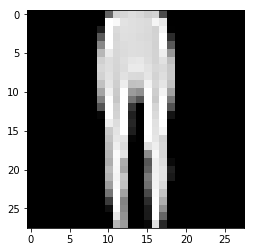

In [7]:
index = np.random.choice(range(len(train_images)))
plt.imshow(train_images[index].reshape((28, 28)), cmap="gray")

In [8]:
def scale_features(images):
    scaler = StandardScaler()
    scaler.fit(images)
    return scaler.transform(images)

train_images = scale_features(train_images)
val_images = scale_features(val_images)

/Users/joeltio/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/joeltio/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/joeltio/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/joeltio/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


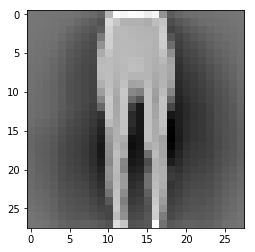

In [9]:
plt.imshow(train_images[index].reshape((28, 28)), cmap="gray")

## Creating a neural network

Now we are ready to create the neural network. Recall that there are 3 types of layers: the input layer, hidden layer and output layer.

Use dense layers with 600 neurons and ReLU activation for the hidden layers and use a dense layer with 10 neurons (because there are 10 outputs) and softmax activation for the output layer.

In [10]:
# Create a sequential model
model = models.Sequential()

# Add the input layer
model.add(layers.InputLayer(input_shape=train_images[0].shape))
model.add(layers.Dense(600, activation="relu"))

# Add the hidden layers
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))
model.add(layers.Dense(600, activation="relu"))

# Add the output layer
model.add(layers.Dense(10, activation="softmax"))

model_compile_config = {
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
    "metrics": ["accuracy"],
}

model_train_config = {
    "batch_size": 60,
    "epochs": 4,
}

model.compile(**model_compile_config)

## Train the neural network
We will be covering more about things you can configuration for training the neural network in the next lecture. For now, just add `**model_train_config` to the end of your parameter list.

What you do need to know is how to use the required parameters of the `fit` method. We assign the variable `history` to the results of the model training. `history` records the training statistics for each iteration of training.

In [11]:
# Train the model
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), **model_train_config)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 46s 773us/step - loss: 0.5256 - acc: 0.8203 - val_loss: 0.4386 - val_acc: 0.8522
Epoch 2/4
60000/60000 [==============================] - 30s 507us/step - loss: 0.4038 - acc: 0.8608 - val_loss: 0.4315 - val_acc: 0.8556
Epoch 3/4
60000/60000 [==============================] - 37s 618us/step - loss: 0.3520 - acc: 0.8782 - val_loss: 0.3970 - val_acc: 0.8620
Epoch 4/4
60000/60000 [==============================] - 49s 822us/step - loss: 0.3258 - acc: 0.8852 - val_loss: 0.3990 - val_acc: 0.8627


## Evaluating the neural network with a learning curve
Recall that we can diagnose overfitting and underfitting using two curves: a loss by epochs curve for the training dataset and a loss by epochs curve for the validation dataset.

### Underfitting
<figure style="width: 40%; display: inline-block">
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Does-Not-Have-Sufficient-Capacity.png" alt="Underfitting - Model not complex enough">
    <figcaption style="text-align: center">Model not complex enough</figcaption>
</figure>

<figure style="width: 40%; display: inline-block">
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Requires-Further-Training.png" alt="Underfitting - Need more training">
    <figcaption style="text-align: center">Need more training</figcaption>
</figure>

### Overfitting
<figure style="width: 40%; display: inline-block">
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png" alt="Overfitting">
    <figcaption style="text-align: center">Need more training</figcaption>
</figure>

So, we need to plot these curves. We can use `matplotlib`'s `pyplot` to plot this data:

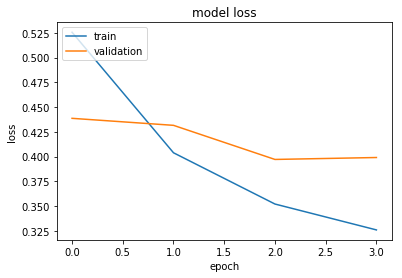

In [12]:
# Plot two curves, one for the training loss and one for validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Label the graph
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Now, observing the graph, take the appropriate actions to rectify overfitting or underfitting by changing the model above.

## Your model in action
The following section just tests your model on 1 dataset.

The test image is a T-shirt/top
The model thinks it is a T-shirt/top


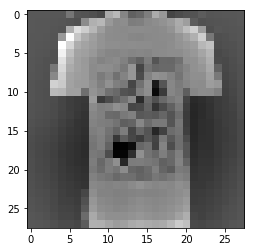

In [18]:
# Label labels
label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Pick a random image from the validation dataset
index = np.random.choice(range(len(val_images)))
test_image = val_images[index]

# Show the image
plt.imshow(test_image.reshape((28, 28)), cmap="gray")
print(f"The test image is a {label[np.argmax(val_labels[index])]}")

# Predict with the model
prediction = np.argmax(model.predict(test_image.reshape((1, 784))))

print(f"The model thinks it is a {label[prediction]}")